## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the data file 
hcc_df = pd.read_csv('/content/drive/My Drive/hcc-data.txt',sep = ",",header = None)
hcc_df.columns = ['Gender',
'Symptoms', 
'Alcohol' ,
'Hepatitis B Surface Antigen', 
'Hepatitis B e Antigen',
'Hepatitis B Core Antibody',
'Hepatitis C Virus Antibody',
'Cirrhosis' ,
'Endemic Countries', 
'Smoking',
'Diabetes',
'Obesity' ,
'Hemochromatosis',
'Arterial Hypertension',
'Chronic Renal Insufficiency',
'Human Immunodeficiency Virus',
'Nonalcoholic Steatohepatitis',
'Esophageal Varices',
'Splenomegaly',
'Portal Hypertension', 
'Portal Vein Thrombosis',
'Liver Metastasis' ,
'Radiological Hallmark', 
'Age at diagnosis integer',
'Grams of Alcohol per day' ,
'Packs of cigarets per year', 
'Performance Status',
'Encefalopathy degree',
'Ascites degree',
'International Normalised Ratio', 
'Alpha-Fetoprotein' ,
'Haemoglobin',
'Mean Corpuscular Volume', 
'Leukocytes' ,
'Platelets',
'Albumin' ,
'Total Bilirubin',
'Alanine transaminase', 
'Aspartate transaminase',
'Gamma glutamyl transferase',
'Alkaline phosphatase',
'Total Proteins',
'Creatinine',
'Number of Nodules integer',
'Major dimension of nodule',
'Direct Bilirubin',
'Iron' ,
'Oxygen Saturation',
'Ferritin',
'Class']

In [ ]:
hcc_df

,Gender,Symptoms,Alcohol,Hepatitis B Surface Antigen,Hepatitis B e Antigen,Hepatitis B Core Antibody,Hepatitis C Virus Antibody,Cirrhosis,Endemic Countries,Smoking,Diabetes,Obesity,Hemochromatosis,Arterial Hypertension,Chronic Renal Insufficiency,Human Immunodeficiency Virus,Nonalcoholic Steatohepatitis,Esophageal Varices,Splenomegaly,Portal Hypertension,Portal Vein Thrombosis,Liver Metastasis,Radiological Hallmark,Age at diagnosis integer,Grams of Alcohol per day,Packs of cigarets per year,Performance Status,Encefalopathy degree,Ascites degree,International Normalised Ratio,Alpha-Fetoprotein,Haemoglobin,Mean Corpuscular Volume,Leukocytes,Platelets,Albumin,Total Bilirubin,Alanine transaminase,Aspartate transaminase,Gamma glutamyl transferase,Alkaline phosphatase,Total Proteins,Creatinine,Number of Nodules integer,Major dimension of nodule,Direct Bilirubin,Iron,Oxygen Saturation,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,1,?,1,0,0,0,0,1,0,0,0,0,1,67,137,15,0,1,1,1.53,95,13.7,106.6,4.9,99,3.4,2.1,34,41,183,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,0,?,0,0,0,0,1,1,?,?,1,0,0,1,0,0,0,1,0,0,0,0,1,62,0,?,0,1,1,?,?,?,?,?,?,?,?,?,?,?,?,?,?,1,1.8,?,?,?,?,1
2,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,78,50,50,2,1,2,0.96,5.8,8.9,79.8,8.4,472,3.3,0.4,58,68,202,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,77,40,30,0,1,1,0.95,2440,13.4,97.1,9,279,3.7,0.4,16,64,94,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,1,1,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,76,100,30,0,1,1,0.94,49,14.3,95.1,6.4,199,4.1,0.7,147,306,173,109,6.9,1.8,1,9,?,59,15,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0,1,?,?,?,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,40,?,?,0,1,1,0.84,?,15.4,109.2,9.3,184000,4.6,0.5,35,40,449,109,7.6,0.7,5,3,?,?,?,?,1
161,0,1,0,?,?,?,?,1,0,0,0,0,0,1,0,?,0,1,1,1,0,0,1,68,0,0,2,1,1,1.33,4887,12.1,88.9,2.5,141,3,3.6,50,91,147,280,6.7,0.7,1,2.2,2.3,?,?,?,0
162,1,0,1,0,0,0,0,1,0,1,1,1,0,1,1,0,?,?,?,?,0,0,1,65,?,48,0,1,1,1.13,75,13.3,90,8,385000,4.3,0.6,53,52,164,181,7.5,1.46,5,18.6,?,?,?,?,1
163,1,0,1,1,0,1,1,1,1,1,0,0,0,0,0,1,0,?,?,?,1,1,1,44,?,?,2,1,1,2.14,94964,15.6,117.3,5200,118000,4.8,1.1,50,60,320,170,8.4,0.74,5,18,?,?,?,?,0


In [ ]:
# getting rid of all ? in data
hcc_df.replace('?',np.nan,inplace=True)

In [ ]:
# get information about dataset
hcc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          165 non-null    int64 
 1   Symptoms                        147 non-null    object
 2   Alcohol                         165 non-null    int64 
 3   Hepatitis B Surface Antigen     148 non-null    object
 4   Hepatitis B e Antigen           126 non-null    object
 5   Hepatitis B Core Antibody       141 non-null    object
 6   Hepatitis C Virus Antibody      156 non-null    object
 7   Cirrhosis                       165 non-null    int64 
 8   Endemic Countries               126 non-null    object
 9   Smoking                         124 non-null    object
 10  Diabetes                        162 non-null    object
 11  Obesity                         155 non-null    object
 12  Hemochromatosis                 142 non-null    ob

AS, we see here there are alot of nulls in the data and we could not remove them so we use KNNImputer to predict the unkown data 

In [ ]:
imputer = KNNImputer()
# fit on the dataset
imputer.fit(hcc_df.iloc[:,:-1].values)
# transform the dataset
hcc_df.iloc[:,:-1] = imputer.transform(hcc_df.iloc[:,:-1].values)

In [ ]:
# rounding the results from knnImputer as it gives the mean and there are nominal features and int features like age
hcc_df.iloc[:,:23] = hcc_df.iloc[:,:23].round().astype('int')
hcc_df.iloc[:,26:29] = hcc_df.iloc[:,26:29].round().astype('int')
hcc_df.iloc[:,43] = hcc_df.iloc[:,43].round().astype('int')
hcc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          165 non-null    int64  
 1   Symptoms                        165 non-null    int64  
 2   Alcohol                         165 non-null    int64  
 3   Hepatitis B Surface Antigen     165 non-null    int64  
 4   Hepatitis B e Antigen           165 non-null    int64  
 5   Hepatitis B Core Antibody       165 non-null    int64  
 6   Hepatitis C Virus Antibody      165 non-null    int64  
 7   Cirrhosis                       165 non-null    int64  
 8   Endemic Countries               165 non-null    int64  
 9   Smoking                         165 non-null    int64  
 10  Diabetes                        165 non-null    int64  
 11  Obesity                         165 non-null    int64  
 12  Hemochromatosis                 165 

## Helper Functions

In [ ]:
def print_report( y_actual, y_pred):
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
    
    accuracy = accuracy_score(y_pred, y_actual)
    recall = recall_score(y_pred, y_actual)
    precision = precision_score(y_pred,y_actual)
    fscore = f1_score(y_pred, y_actual)

    print('Accuracy: %.3f'%accuracy)
    print('Recall: %.3f'%recall)
    print('Precision: %.3f'%precision)
    print('F-Score: %.3f'%fscore)
    print(' ')
        

In [ ]:
def plot_confusion_matrix(y_test,y_pred,labels):
    import seaborn as sns
    from sklearn import metrics
    cm = metrics.confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cm)
    cm = cm.rename(columns=labels, index=labels)
    fig = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g');
    return fig

## Training on the dataset without handling imbalance

In [ ]:
#standardize dataset
sc = StandardScaler()
X = sc.fit_transform(hcc_df.iloc[:,:-1].values)
X_train,X_test,y_train,y_test=train_test_split(X,hcc_df.iloc[:,-1].values,test_size=0.2,random_state=0)

In [ ]:
# using piplines
scm_pipline = Pipeline(steps=[
                              ('Sc',StandardScaler()),
                              ('Svm',SVC(random_state=0))
])
rf_pipline = Pipeline(steps=[
                             ('Sc',StandardScaler()),
                             ('Rf',RandomForestClassifier())
                             ])
piplines = [scm_pipline,rf_pipline]

In [ ]:
#training all models in piplines 
for pipe in piplines:
  pipe.fit(X_train,y_train)

In [ ]:
# predicting the testing data
y_pred = []
for i,model in enumerate(piplines):
    y_pred.append(model.predict(X_test))

Accuracy: 0.667
Recall: 0.682
Precision: 0.789
F-Score: 0.732
 


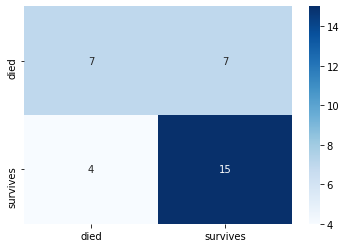

In [ ]:
#print rscores and confusion matrix 
print_report(y_test,y_pred[0])
plot_confusion_matrix(y_test,y_pred[0],{0:'died',1:'survives'});

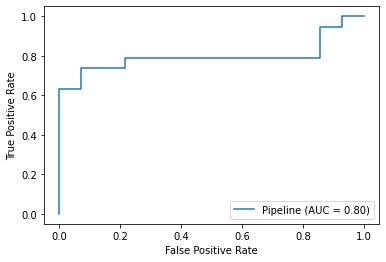

In [ ]:
plot_roc_curve(piplines[0],X_test,y_test);

As, we see here there are 4 false negative values and 7 false postives. As, we see the model could predict the survives more accurate than died. These is beacuse the data of survives is bigger than that of died.

Accuracy: 0.697
Recall: 0.696
Precision: 0.842
F-Score: 0.762
 


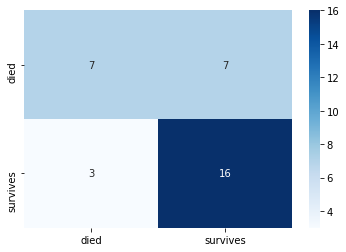

In [ ]:
print_report(y_test,y_pred[1])
plot_confusion_matrix(y_test,y_pred[1],{0:'died',1:'survives'});

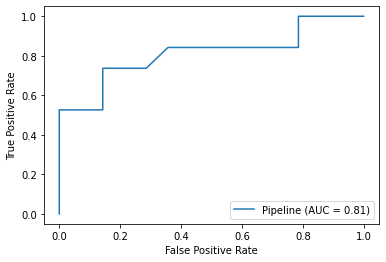

In [ ]:
plot_roc_curve(piplines[1],X_test,y_test);

As, we see here there are 3 false negative values and 7 false postives. And also with random forest model the model predict the survives more accurate than died.So, we should handle that imbalance 

## handle imbalance


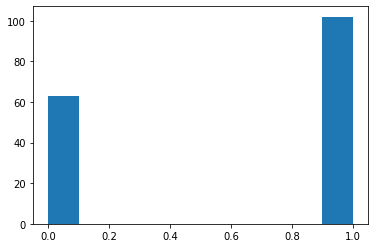

In [ ]:
plt.hist(hcc_df['Class']);

In [ ]:
print('The percnetage of survived patients: ',(hcc_df[hcc_df['Class'] == 1].Class.count()/hcc_df.shape[0]), '%')
print('The percnetage of died patients: ',(hcc_df[hcc_df['Class'] == 0].Class.count()/hcc_df.shape[0]), '%')

The percnetage of survived patients:  0.6181818181818182 %
The percnetage of died patients:  0.38181818181818183 %


As, we see her the number of died patients is only 0.38% of the dataset, while the survived is 0.62%

### Over Sampling

In [ ]:
from  imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X, hcc_df.iloc[:,-1])
X_train_over,X_test_over,y_train_over,y_test_over =train_test_split(X_over,y_over,test_size=0.2,random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



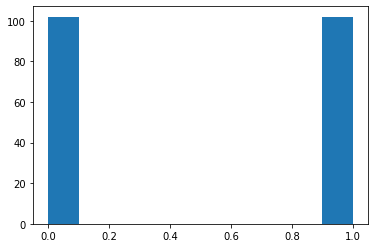

In [ ]:
plt.hist(y_over);

After over sampling the died now is equal to the number of  survived 

In [ ]:
for pipe in piplines:
  pipe.fit(X_train_over,y_train_over)

In [ ]:
y_pred = []
for i,model in enumerate(piplines):
    y_pred.append(model.predict(X_test_over))



------------Model 1--------------
Accuracy: 0.780
Recall: 0.762
Precision: 0.800
F-Score: 0.780
 


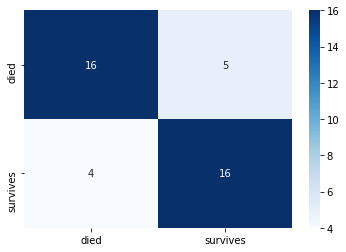

In [ ]:
print('------------Model 1--------------')
print_report(y_test_over,y_pred[0])
plot_confusion_matrix(y_test_over,y_pred[0],{0:'died',1:'survives'});


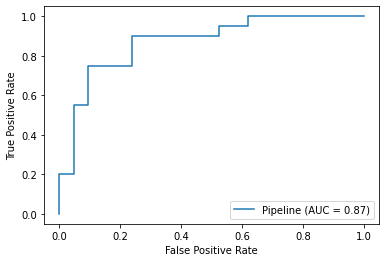

In [ ]:
plot_roc_curve(piplines[0],X_test_over,y_test_over);

As, we see here there are 4 false negative values and 5 false postives. As, we see the model predforms better and could predicts died people as well as survived.

------------Model 2--------------
Accuracy: 0.878
Recall: 0.895
Precision: 0.850
F-Score: 0.872
 


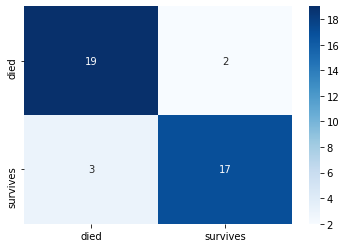

In [ ]:
print('------------Model 2--------------')
print_report(y_test_over,y_pred[1])
plot_confusion_matrix(y_test_over,y_pred[1],{0:'died',1:'survives'});

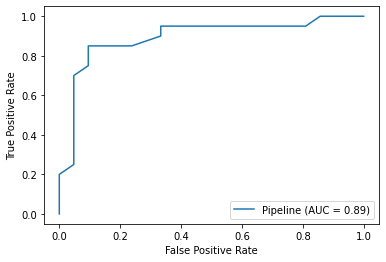

In [ ]:
plot_roc_curve(piplines[1],X_test_over,y_test_over);

As, we see here there are e false negative values and 2 false postives. As, we see the model predforms better and rather it could predicts died people more accurate than survived.

### Under Sampling

In [ ]:
from  imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler()
X_under, y_under = undersample.fit_resample(X, hcc_df.iloc[:,-1])
X_train_under,X_test_under,y_train_under,y_test_under =train_test_split(X_under,y_under,test_size=0.2,random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



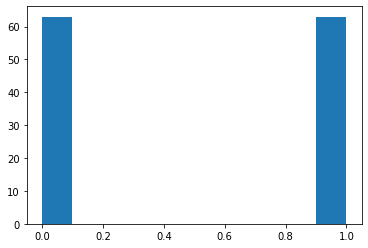

In [ ]:
plt.hist(x= y_under);

As, we see here the number of survived are under sampled to be the same number of died people. 

In [ ]:
for pipe in piplines:
  pipe.fit(X_train_under,y_train_under)

In [ ]:
y_pred = []
for i,model in enumerate(piplines):
    y_pred.append(model.predict(X_test_under))



------------Model 1--------------
Accuracy: 0.692
Recall: 0.667
Precision: 0.545
F-Score: 0.600
 


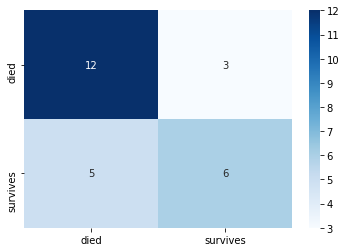

In [ ]:
print('------------Model 1--------------')
print_report(y_test_under,y_pred[0])
plot_confusion_matrix(y_test_under,y_pred[0],{0:'died',1:'survives'});


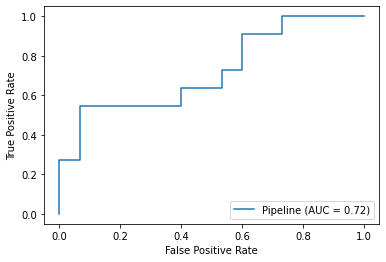

In [ ]:
plot_roc_curve(piplines[0],X_test_under,y_test_under);

As, we see here there are 5 false negative values and 3 false postives. And, the model could predicts the died people more often than survived 

------------Model 2--------------
Accuracy: 0.577
Recall: 0.500
Precision: 0.636
F-Score: 0.560
 


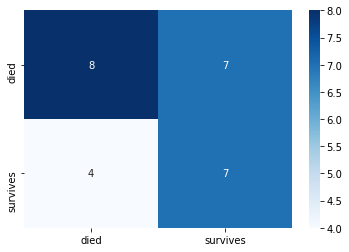

In [ ]:
print('------------Model 2--------------')
print_report(y_test_under,y_pred[1])
plot_confusion_matrix(y_test_under,y_pred[1],{0:'died',1:'survives'});

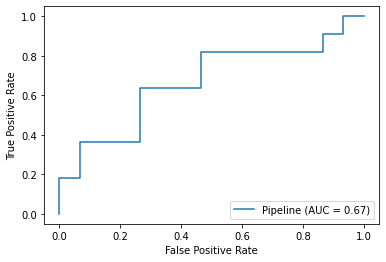

In [ ]:
plot_roc_curve(piplines[1],X_test_under,y_test_under);

As, we see here there are 4 false negative values and 7 false postives. And, the model could predicts the died people more often than survived. So, as we see here the under sample affects the survived data.

### Using Ensemble

In [ ]:
svm = SVC()
rf = RandomForestClassifier()
vt = VotingClassifier(estimators=[('svm',svm),('rf',rf)],n_jobs=-1)

In [ ]:
vt.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_no

------------Model 1--------------
Accuracy: 0.927
Recall: 0.905
Precision: 0.950
F-Score: 0.927
 


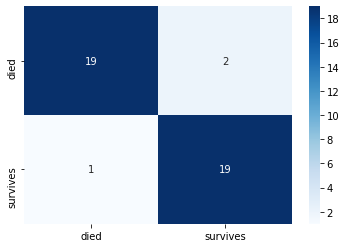

In [ ]:
y_pred = vt.predict(X_test_over)
print('------------Model 1--------------')
print_report(y_test_over,y_pred)
plot_confusion_matrix(y_test_over,y_pred,{0:'died',1:'survives'});

As, we see here there are 1 false negative values and 2 false postives. And, the model could predicts the died people same as  survived. So, as we see here the voting model is the best model that solves the imbalance data in our case